In [1]:
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [6]:
df = pd.read_csv('ozon.csv')
df

,radiation,temperature,wind,ozone
0,190,67,7.4,41
1,118,72,8.0,36
2,149,74,12.6,12
3,313,62,11.5,18
4,299,65,8.6,23
...,...,...,...,...
106,20,63,16.6,14
107,193,70,6.9,30
108,191,75,14.3,14
109,131,76,8.0,18


In [15]:
# create array of labels
Y = np.array(df['ozone'])
Y = Y.reshape(len(Y) , 1)
Y

array([[ 41],
       [ 36],
       [ 12],
       [ 18],
       [ 23],
       [ 19],
       [  8],
       [ 16],
       [ 11],
       [ 14],
       [ 18],
       [ 14],
       [ 34],
       [  6],
       [ 30],
       [ 11],
       [  1],
       [ 11],
       [  4],
       [ 32],
       [ 23],
       [ 45],
       [115],
       [ 37],
       [ 29],
       [ 71],
       [ 39],
       [ 23],
       [ 21],
       [ 37],
       [ 20],
       [ 12],
       [ 13],
       [135],
       [ 49],
       [ 32],
       [ 64],
       [ 40],
       [ 77],
       [ 97],
       [ 97],
       [ 85],
       [ 10],
       [ 27],
       [  7],
       [ 48],
       [ 35],
       [ 61],
       [ 79],
       [ 63],
       [ 16],
       [ 80],
       [108],
       [ 20],
       [ 52],
       [ 82],
       [ 50],
       [ 64],
       [ 59],
       [ 39],
       [  9],
       [ 16],
       [122],
       [ 89],
       [110],
       [ 44],
       [ 28],
       [ 65],
       [ 22],
       [ 59],
       [ 23],
      

In [19]:
# create X matrix
df_X = df.drop(['ozone'] , axis=1)
X = np.array(df_X).reshape(111 , 3)

# Create a column of ones
ones_column = np.ones((111, 1))

# Stack the column of ones to the original matrix
X = np.hstack((ones_column,X))
X

array([[  1. , 190. ,  67. ,   7.4],
       [  1. , 118. ,  72. ,   8. ],
       [  1. , 149. ,  74. ,  12.6],
       [  1. , 313. ,  62. ,  11.5],
       [  1. , 299. ,  65. ,   8.6],
       [  1. ,  99. ,  59. ,  13.8],
       [  1. ,  19. ,  61. ,  20.1],
       [  1. , 256. ,  69. ,   9.7],
       [  1. , 290. ,  66. ,   9.2],
       [  1. , 274. ,  68. ,  10.9],
       [  1. ,  65. ,  58. ,  13.2],
       [  1. , 334. ,  64. ,  11.5],
       [  1. , 307. ,  66. ,  12. ],
       [  1. ,  78. ,  57. ,  18.4],
       [  1. , 322. ,  68. ,  11.5],
       [  1. ,  44. ,  62. ,   9.7],
       [  1. ,   8. ,  59. ,   9.7],
       [  1. , 320. ,  73. ,  16.6],
       [  1. ,  25. ,  61. ,   9.7],
       [  1. ,  92. ,  61. ,  12. ],
       [  1. ,  13. ,  67. ,  12. ],
       [  1. , 252. ,  81. ,  14.9],
       [  1. , 223. ,  79. ,   5.7],
       [  1. , 279. ,  76. ,   7.4],
       [  1. , 127. ,  82. ,   9.7],
       [  1. , 291. ,  90. ,  13.8],
       [  1. , 323. ,  87. ,  11.5],
 

In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=40)
print('Training set shape:' , X_train.shape)
print('Test set shape:' , X_test.shape)

Training set shape: (88, 4)
Test set shape: (23, 4)


In [23]:
# Apply linear Regression
beta_vetor = np.matmul(np.matmul(np.linalg.inv(np.matmul(X_train.T, X_train)) , X_train.T) , y_train)
beta_vetor

array([[-46.34742067],
       [  0.07194909],
       [  1.38880365],
       [ -3.35778647]])

In [72]:
# training Error
y_train_preds = np.matmul(X_train , beta_vetor)
train_error = (np.linalg.norm(y_train_preds - y_train)**2)/len(y_train)
print('Training Error:' , train_error)

# test Error
y_test_preds = np.matmul(X_test , beta_vetor)
test_error = (np.linalg.norm(y_test_preds - y_test)**2)/len(y_test)
print('Test Error:' , test_error)

Training Error: 454.6124968811164
Test Error: 374.38879661459436


### Add Gaussian noise

In [49]:
def regression_noisy(std_value):    
    # Generate Gaussian noise 
    noise = np.random.normal(0, std_value, Y.shape)
    # Add the generated noise to the vector
    noisy_labels = Y + noise
    # Split the data into training and testing sets
    X_train, X_test, y_train_noisy, y_test_noisy = train_test_split(X, noisy_labels, test_size=0.2, random_state=40)
    # Apply linear Regression
    beta_vetor = np.matmul(np.matmul(np.linalg.inv(np.matmul(X_train.T, X_train)) , X_train.T) , y_train_noisy)
#     print('Gaussian Noise Standard Deviation:' , std_value)
    # training Error
    y_train_preds = np.matmul(X_train , beta_vetor)
    train_error = (np.linalg.norm(y_train_preds - y_train)**2)/len(y_train)
#     print('Training Error:' , train_error)
    # test Error
    y_test_preds = np.matmul(X_test , beta_vetor)
    test_error = (np.linalg.norm(y_test_preds - y_test)**2)/len(y_test)
#     print('Test Error:' , test_error)
#     print('-----------------------------------------')
    return train_error , test_error

In [50]:
# Calculate train test/test errors and plot
std_values = np.arange(51)
list_of_test_errors = []
list_of_train_errors = []
for std in std_values:
    train_error , test_error= regression_noisy(std)
    list_of_train_errors.append(train_error)
    list_of_test_errors.append(test_error)

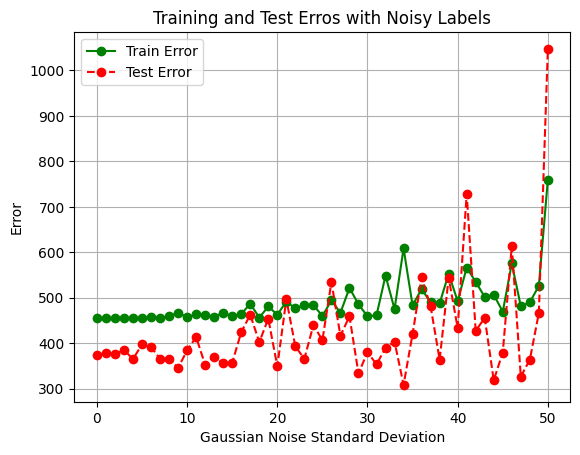

In [60]:
# plot the errors
plt.plot(std_values , list_of_train_errors , 'go-')
plt.plot(std_values , list_of_test_errors , 'ro--')
plt.xlabel('Gaussian Noise Standard Deviation')
plt.ylabel('Error')
plt.title('Training and Test Erros with Noisy Labels')
plt.legend(['Train Error' , 'Test Error'])
plt.grid()

همانطور که انتظار میرود با افزایش واریانس نویز،میزان خطای تست و آموزش افزایش میابد.

### Add square feature

In [67]:
# create array of labels
Y = np.array(df['ozone'])
Y = Y.reshape(len(Y) , 1)

# create X matrix
df_X = df.drop(['ozone'] , axis=1)
X = np.array(df_X).reshape(111 , 3)
squared = X**2

# Stack the square values to the original matrix
X = np.hstack((ones_column,X))
X_squared = np.hstack((X , squared))
X_squared.shape

(111, 7)

In [70]:
def regression_squared(X_squared , Y):    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_squared, Y, test_size=0.2, random_state=40)
    # Apply linear Regression
    beta_vetor = np.matmul(np.matmul(np.linalg.inv(np.matmul(X_train.T, X_train)) , X_train.T) , y_train)
    # training Error
    y_train_preds = np.matmul(X_train , beta_vetor)
    train_error = (np.linalg.norm(y_train_preds - y_train)**2)/len(y_train)
    print('Training Error:' , train_error)
    # test Error
    y_test_preds = np.matmul(X_test , beta_vetor)
    test_error = (np.linalg.norm(y_test_preds - y_test)**2)/len(y_test)
    print('Test Error:' , test_error)
#     return train_error , test_error

In [71]:
regression_squared(X_squared , Y)

Training Error: 310.66719629056024
Test Error: 339.91491202876955


با توجه به اضافه شدن فیچرهای درجه دوم همانطور که انتظار میرفت میزان خطا کاهش یافته است.

# Part 2

In [2]:
# load all the images and convert to Grayscale
dir_list = os.listdir('surprise videos-20231031T224044Z-001/surprise videos')
images = []
number = []
for folder in dir_list:
    temp = []
    for file in glob.glob(f'D:/Uni-02-03(1)/CVML LAB/Labs/LAB2/surprise videos-20231031T224044Z-001/surprise videos/{folder}/*.png'):
        images.append(cv2.cvtColor(cv2.imread(file),cv2.COLOR_BGR2GRAY))
        temp.append(cv2.cvtColor(cv2.imread(file),cv2.COLOR_BGR2GRAY))
    number.append(len(temp))

In [3]:
labels = []
for n in number:
    labels.append(np.linspace(0,1,num=n))

In [4]:
from itertools import chain
Y = list(chain.from_iterable(labels))

In [5]:
#reshape images
print(np.array(images).shape)
data = np.array(images).reshape(633,900 * 1200)
print(data.shape)

(633, 900, 1200)
(633, 1080000)


In [6]:
# split data
X_train, X_test, y_train, y_test = train_test_split(data, Y, test_size=0.4, random_state=40)

In [11]:
# Apply linear Regression
def regression(X_train , y_train ,X_test , y_test):
    beta_vetor = np.matmul(np.matmul(np.linalg.inv(np.matmul(X_train.T, X_train)) , X_train.T) , y_train)
    print('Model fitted!')
    # training Error
    y_train_preds = np.matmul(X_train , beta_vetor)
    train_error = (np.linalg.norm(y_train_preds - y_train)**2)/len(y_train)
    print('Training Error:' , train_error)

    # test Error
    y_test_preds = np.matmul(X_test , beta_vetor)
    test_error = (np.linalg.norm(y_test_preds - y_test)**2)/len(y_test)
    print('Test Error:' , test_error)
    return y_train_preds , y_test_preds , train_error , test_error

In [59]:
y_train_preds , y_test_preds = regression(X_train , y_train ,X_test , y_test)

MemoryError: Unable to allocate 1.06 TiB for an array with shape (1080000, 1080000) and data type uint8

با توجه به تعداد بسیار زیاد فیچرها نمیتوان مدل را آموزش داد.

### croped images

In [8]:
croped_images_list = []
for i in range(633):
    croped_images_list.append(images[i][150:750,300:900])

In [9]:
#reshape images
print(np.array(croped_images_list).shape)
data_croped = np.array(croped_images_list).reshape(633,600 * 600).astype('float64')
print(data_croped.shape)

(633, 600, 600)
(633, 360000)


In [89]:
# split data
X_train, X_test, y_train, y_test = train_test_split(data_croped, Y, test_size=0.4, random_state=40)
# train and predict
y_train_preds , y_test_preds = regression(X_train , y_train ,X_test , y_test)

MemoryError: Unable to allocate 966. GiB for an array with shape (360000, 360000) and data type float64

ایعاد تصاویر را کاهش دادیم و حاشیه تصاویر را حذف کردیم اما باز هم با توجه به تعداد بسیار زیاد فیچرها نمیتوان مدل را آموزش داد.

### Resize

In [35]:
resized_images_list = []
for i in range(633):
    resized = cv2.resize(croped_images_list[i],(120,120), interpolation = cv2.INTER_AREA)
    resized_images_list.append(resized)
    
#reshape images
print(np.array(resized_images_list).shape)
data_resized = np.array(resized_images_list).reshape(633,120 * 120).astype('float64')
print(data_resized.shape)

(633, 120, 120)
(633, 14400)


In [36]:
# split data
X_train, X_test, y_train, y_test = train_test_split(data_resized, Y, test_size=0.4, random_state=40)
# train and predict
y_train_preds, y_test_preds, train_error, test_error= regression(X_train , y_train ,X_test , y_test)

Model fitted!
Training Error: 1073495.0658974922
Test Error: 21237844.288943153


خطا به شدت بالا میباشد چرا که با کاهش رزولوشن تصاویر بخش زیادی از اطلاعات از بین رفته و مدل دیتای مناسبی را برای یادگیری پارامترها در اختیار ندارد.
با توجه به اختلاف بسیار زیاد خطای تست و آموزش مدل در فاز آندرفیتیگ قرار دارد.

### PCA

In [12]:
# split data
X_train, X_test, y_train, y_test = train_test_split(data_resized, Y, test_size=0.4, random_state=40)

# fit PCA
X = X_train
pca = PCA(n_components=20)
X_train_reduced = pca.fit_transform(X)
# reconstructed = pca.inverse_transform(X_new)

X_test_reduced = pca.transform(X_test)
# reconstructed = pca.inverse_transform(new_test)

# train and predict
y_train_preds , y_test_preds , train_error , test_error = regression(X_train_reduced , y_train ,X_test_reduced , y_test)

Model fitted!
Training Error: 0.3063896506055769
Test Error: 0.3076245770258838


In [18]:
train_error_list = []
test_error_list = []
for n in range(1,101):
    X = X_train
    pca = PCA(n_components=n)
    X_train_reduced = pca.fit_transform(X)
    X_test_reduced = pca.transform(X_test)
    # train and predict
    y_train_preds , y_test_preds , train_error , test_error = regression(X_train_reduced , y_train ,X_test_reduced , y_test)
    train_error_list.append(train_error)
    test_error_list.append(test_error)

Model fitted!
Training Error: 0.35055255978145133
Test Error: 0.3302757669382196
Model fitted!
Training Error: 0.35039636023084003
Test Error: 0.32968077062321094
Model fitted!
Training Error: 0.3460014426063865
Test Error: 0.3253448296624285
Model fitted!
Training Error: 0.3449636568053064
Test Error: 0.3216197868300361
Model fitted!
Training Error: 0.34457122772325227
Test Error: 0.3208388057523632
Model fitted!
Training Error: 0.3445297040142087
Test Error: 0.32145506403590624
Model fitted!
Training Error: 0.3442601420394997
Test Error: 0.3223227223235174
Model fitted!
Training Error: 0.33978570483000353
Test Error: 0.3162980644475467
Model fitted!
Training Error: 0.3367036569164084
Test Error: 0.3169440760145514
Model fitted!
Training Error: 0.336603180765029
Test Error: 0.31879727517186607
Model fitted!
Training Error: 0.325766256248618
Test Error: 0.3147605621001137
Model fitted!
Training Error: 0.3252776652909534
Test Error: 0.31383234651070196
Model fitted!
Training Error: 0.31

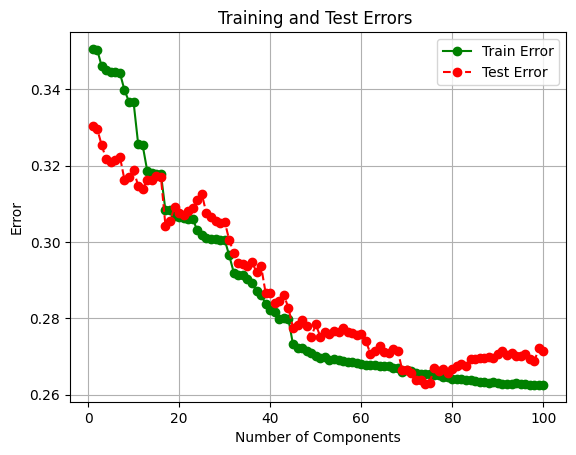

In [19]:
# plot the errors
plt.plot(np.arange(1,101) , train_error_list , 'go-')
plt.plot(np.arange(1,101), test_error_list , 'ro--')
plt.xlabel('Number of Components')
plt.ylabel('Error')
plt.title('Training and Test Errors ')
plt.legend(['Train Error' , 'Test Error'])
plt.grid()

نسبت به قسمت قبل میزان خطا به شدت کاهش یافته چرا که در قسمت قبل برای کاهش تعداد ویژگی ها که همان پیکسل های خام تصاویر بودند،رزولوشن تصاویر را کاهش دادیم که این امر باعث از بین اطلاعات میشود اما در این مرحله با کاهش ابعاد با استفاده از مولفه های اساسی بخش عمده اطلاعات حفظ شده و در نتیجه مدل میتواند بهتر یادبگیرد و در نهایت خطای بسیار کمتری را به دست میدهد.
و مدل توانسته است پارامترها را به خوبی یادبگیرد.

.بهترین خطای تست با حدود 75 ویژگی به دست میاید